# Main Project

### Domain: HR


Objective

Attrition is a problem that impacts all businesses irrespective of the industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring and training of new staff.

With the use of Supervised Machine Learning Classification models, we will try to predict the attrition of individual employees based on a combination of personal and institution-wide factors & will compare the results of each algorithm to evaluate the predictive models for this classification task.


In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('Project-HR Analytics Attrition.csv')
#displaying  top 5  rows of the dataset
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94             NaN         2   
1                        3    Male          61             2.0         2   
2                        4    Male          92             2.0         1   
3                        4  Female          56             NaN         1   
4                        1    Male          40             NaN         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                3.0                         1             80   
1                4.0                         4             80   
2                3.0                         2             80   
3                3.0                         3             80   
4                3.0                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              1.0               6                   4   
1              3.0              10                   7   
2              3.0               0                   0   
3              NaN               8                   7   
4              NaN               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                      0.0                     5  
1                      1.0                     7  
2                      0.0                     0  
3                      3.0                     0  
4                      2.0                     2

In [3]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1072 non-null   float64
 14  JobLevel

<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  <strong><br> 
    
- (1)This dataset contains  details of 1470 employess in a company provided by HR Department<br>     
    
    
- (2)There are 35 columns/features  <br>  
    
    
- (3)9 of these columns are of object datatype and remaining are of numerical data type.<br> 
    
    
- (4)There is no discrepancies in the datatypes of the corresponding columns. So any data convertion is not needed. <br> 
    
    
- (5)Eventhough 26 columns are of numerical data type ,most of them are categorical columns .<br> 
    
    
- (6)Attrition is our target column.<br> 
    
    
- (7)Also there are some empty/NaN values present in the dataset in the columns of "WorkLifeBalance", "PerformanceRating" , "JobInvolvement", "YearsSinceLastPromotion". <br>  
    

    
</div>

In [4]:
#Summary Statistics
data.describe(include='all')

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  EnvironmentSatisfaction Gender  \
count          1470.0     1470.000000              1470.000000   1470   
unique            NaN             NaN                      NaN      2   
top               NaN             NaN                      NaN   Male   
freq              NaN             NaN                      NaN    882   
mean              1.0     1024.865306                 2.721769    NaN   
std               0.0      602.024335                 1.093082    NaN   
min               1.0        1.000000                 1.000000    NaN   
25%               1.0      491.250000                 2.000000    NaN   
50%               1.0     1020.500000                 3.000000    NaN   
75%               1.0     1555.750000                 4.000000    NaN   
max               1.0     2068.000000                 4.000000    NaN   

         HourlyRate  JobInvolvement     JobLevel          JobRole  \
count   1470.000000     1072.000000  1470.000000             1470   
unique          NaN             NaN          NaN                9   
top             NaN             NaN          NaN  Sales Executive   
freq            NaN             NaN          NaN              326   
mean      65.891156        2.629664     2.063946              NaN   
std       20.329428        0.810745     1.106940              NaN   
min       30.000000        1.000000     1.000000              NaN   
25%       48.000000        2.000000     1.000000              NaN   
50%       66.000000        3.000000     2.000000              NaN   
75%       83.750000        3.000000     3.000000              NaN   
max      100.000000        4.000000     5.000000              NaN   

        JobSatisfaction MaritalStatus  MonthlyIncome   MonthlyRate  \
count       1470.000000          1470    1470.000000   1470.000000   
unique              NaN             3            NaN           NaN   
top                 NaN       Married            NaN           NaN   
freq                NaN           673            NaN           NaN   
mean           2.728571           NaN    6502.931293  14313.103401   
std            1.102846           NaN    4707.956783   7117.786044   
min            1.000000           NaN    1009.000000   2094.000000   
25%            2.000000           NaN    2911.000000   8

In [5]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<div class="alert alert-block alert-info"><b>Statistical Summary:</b><br>  <strong>
      
-  (1)About the attrition,  Majority of the employees are not leaving the company.only a small amount about 16% of the employees have left the company  .<br>  
    
    
-  (2)So this dataset is not a balanced dataset.<br>  
    
    
-  (3)We can see that the max Age of an employee of the company is 60 and min is 18.<br>  
    
    
-  (4)Majority of the employees are rarely travelling for business purposes.<br>  
    
    
-   (5)The employees get an average %hike of around 15.21%.<br>  
    
    
-  (6)Employees live within a radius of 29 miles .<br>
    
    
    
-  (7)There are  employees who have no promotion even after 15 years in the company.<br>
    
    
    
- (8)There are  employees who have been in the same job role even after 18 years in the company.<br>
    
    
- (9)There are  employees who have been working in the company for 40 years.<br>  
    

- (10)<br> 
   DailyRate : Minimum: 102, Maximum: 1499<br> 
   HourlyRate : Minimum: 30, Maximum: 100<br> 
   MonthlyIncome : Minimum: 1009, Maximum: 19999<br> 
   MonthlyRate : Minimum: 2094, Maximum: 26999<br> 

</div>

In [6]:
# setting EmployeeNumber as index
data.set_index('EmployeeNumber', inplace=True)
data.head()

Age Attrition     BusinessTravel  DailyRate  \
EmployeeNumber                                                
1                41       Yes      Travel_Rarely       1102   
2                49        No  Travel_Frequently        279   
4                37       Yes      Travel_Rarely       1373   
5                33        No  Travel_Frequently       1392   
7                27        No      Travel_Rarely        591   

                            Department  DistanceFromHome  Education  \
EmployeeNumber                                                        
1                                Sales                 1          2   
2               Research & Development                 8          1   
4               Research & Development                 2          2   
5               Research & Development                 3          4   
7               Research & Development                 2          1   

               EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  \
EmployeeNumber                                                                  
1               Life Sciences              1                        2  Female   
2               Life Sciences              1                        3    Male   
4                       Other              1                        4    Male   
5               Life Sciences              1                        4  Female   
7                     Medical              1                        1    Male   

                HourlyRate  JobInvolvement  JobLevel                JobRole  \
EmployeeNumber                                                                
1                       94             NaN         2        Sales Executive   
2                       61             2.0         2     Research Scientist   
4                       92             2.0         1  Laboratory Technician   
5                       56             NaN         1     Research Scientist   
7                       40             NaN         1  Laboratory Technician   

                JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                              
1                             4        Single           5993        19479   
2                             2       Married           5130        24907   
4                             3        Single           2090         2396   
5                             3       Married           2909        23159   
7                             2       Married           3468        16632   

                NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
EmployeeNumber                                                          
1                                8      Y      Yes                 11   
2                                1      Y       No                 23   
4                                6      Y      Yes                 15   
5                                1      Y      Yes                 11   
7                                9      Y       No                 12   

                PerformanceRating  RelationshipSatisfaction  StandardHours  \
EmployeeNumber                                                               
1                             3.0                         1             80   
2                             4.0                         4             80   
4                             3.0                         2             80   
5                             3.0                         3             80   
7                             3.0                         4             80   

                StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
EmployeeNumber                                                               
1                              0                  8                      0   
2                              1                 10                      3   
4                              0           

In [7]:
# To check for  duplicate rows
data.duplicated().sum()

0

In [8]:
#categorical & numerical columns
df_obj_only = data.select_dtypes(include=np.object)
df_numerics_only = data.select_dtypes(include=np.number)

In [9]:
# Categorical features
cat_cols = ['BusinessTravel', 'Department','Education','EducationField',
            'EnvironmentSatisfaction','Gender', 'JobInvolvement','JobLevel',
            'JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
            'OverTime','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'
             ]

In [10]:
#to know count of unique value in each coumn
unique_data= [] 
for x in data.columns.tolist():
    num= data[x].nunique()
    value= data[x].unique()
    unique_data.append(pd.Series({'col_name' : x,
               'num_unique' : num,
               'value_unique': value}))
uniques = pd.concat(unique_data,axis=1).T.set_index('col_name')
uniques.sort_values('num_unique')

num_unique  \
col_name                              
Over18                            1   
StandardHours                     1   
EmployeeCount                     1   
PerformanceRating                 2   
Attrition                         2   
OverTime                          2   
Gender                            2   
MaritalStatus                     3   
Department                        3   
BusinessTravel                    3   
EnvironmentSatisfaction           4   
JobInvolvement                    4   
JobSatisfaction                   4   
RelationshipSatisfaction          4   
WorkLifeBalance                   4   
StockOptionLevel                  4   
Education                         5   
JobLevel                          5   
EducationField                    6   
TrainingTimesLastYear             7   
JobRole                           9   
NumCompaniesWorked               10   
PercentSalaryHike                15   
YearsSinceLastPromotion          16   
YearsWithCurrManager             18   
YearsInCurrentRole               19   
DistanceFromHome                 29   
YearsAtCompany                   37   
TotalWorkingYears                40   
Age                              43   
HourlyRate                       71   
DailyRate                       886   
MonthlyIncome                  1349   
MonthlyRate                    1427   

                                                               value_unique  
col_name                                                                     
Over18                                                                  [Y]  
StandardHours                                                          [80]  
EmployeeCount                                                           [1]  
PerformanceRating                                           [3.0, 4.0, nan]  
Attrition                                                         [Yes, No]  
OverTime                                                          [Yes, No]  
Gender                                                       [Female, Male]  
MaritalStatus                                   [Single, Married, Divorced]  
Department                 [Sales, Research & Development, Human Resources]  
BusinessTravel               [Travel_Rarely, Travel_Frequently, Non-Travel]  
EnvironmentSatisfaction                                        [2, 3, 4, 1]  
JobInvolvement                                    [nan, 2.0, 4.0, 3.0, 1.0]  
JobSatisfaction                                                [4, 2, 3, 1]  
RelationshipSatisfaction                                       [1, 4, 2, 3]  
WorkLifeBalance                                   [1.0, 3.0, nan, 2.0, 4.0]  
StockOptionLevel                                               [0, 1, 3, 2]  
Education                                                   [2, 1, 4, 3, 5]  
JobLevel                                                    [2, 1, 3, 4, 5]  
EducationField            [Life Sciences, Other, Medical, Marketing, Tec...  
TrainingTimesLastYear                                 [0, 3, 2, 5, 1, 4, 6]  
JobRole                   [Sales Executive, Research Scientist, Laborato...  
NumCompaniesWorked                           [8, 1, 6, 9, 0, 4, 5, 2, 7, 3]  
PercentSalaryHike         [11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 1...  
YearsSinceLastPromotion   [0.0, 1.0, 3.0, 2.0, nan, 7.0, 4.0, 8.0, 6.0, ...  
YearsWithCurrManager      [5, 7, 0, 2, 6, 8, 3, 11, 17, 1, 4, 12, 9, 10,...  
YearsInCurrentRole        [4, 7, 0, 2, 5, 9, 8, 3, 6, 13, 1, 15, 14, 16,...  
DistanceFromHome          [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...  
YearsAtCompany            [6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14,...  
TotalWorkingYears         [8, 10, 7, 6, 12, 1, 17, 5, 3, 31, 13, 0, 26, ...  
Age                       [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...  
HourlyRate                [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...  
DailyRate                 [1102, 279, 1373, 13

In [11]:
#count of values in each Categorical features
for col in cat_cols:
    print(col,":\n", data[col].value_counts())
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

BusinessTravel :
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Department :
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Education :
 3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
EducationField :
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Envir

In [12]:
# to know count of attrition w.r.t Categorical features
for col in cat_cols:
    print(col,":\n", data.groupby(col)['Attrition'].value_counts())
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

BusinessTravel :
 BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Department :
 Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Education :
 Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           

## Exploratory Data Analysis

### Univariate  analysis

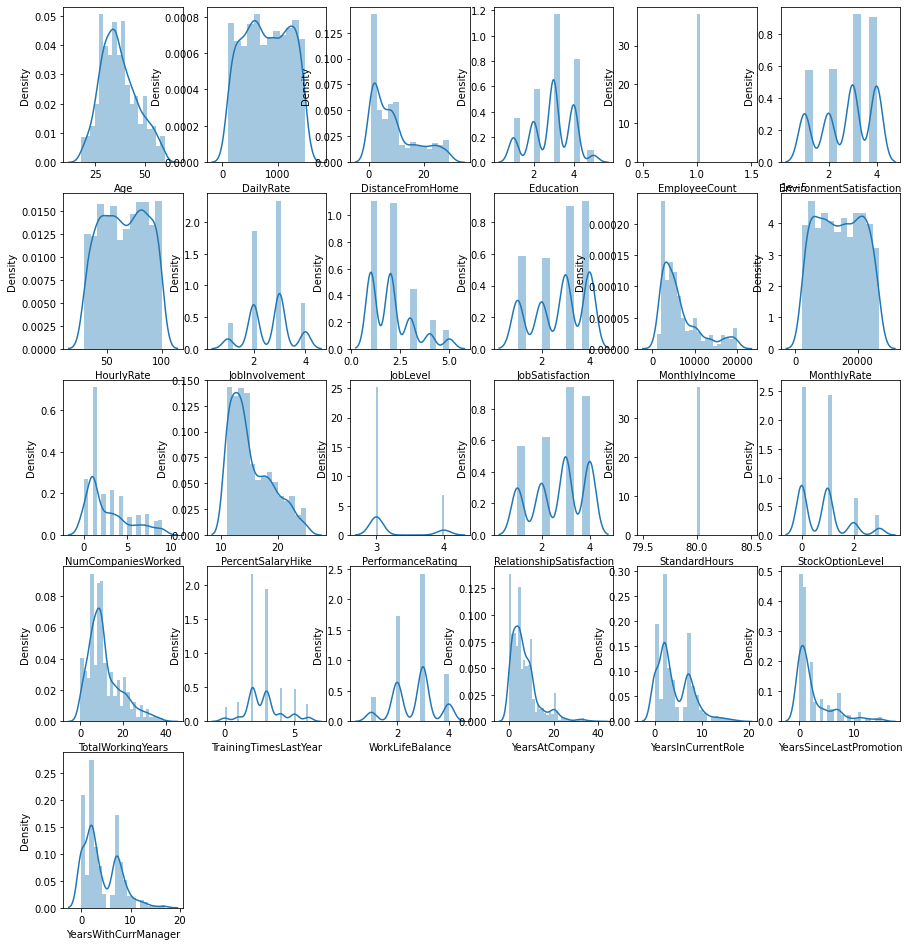

In [13]:
#Distribution plots of all columns
l = df_numerics_only.columns.values
plt.figure(figsize=(15,20))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)
    sns.distplot(data[l[i]],kde=True) 

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
The features - MonthlyIncome, PercentSalaryHike,  TotalWorkingYears,  YearsAtCompany, YearsInCurrentRole,  YearsSinceLastPromotion,  and YearsWithCurrManager seem to be right-skewed. <br>  
    

    
</div>

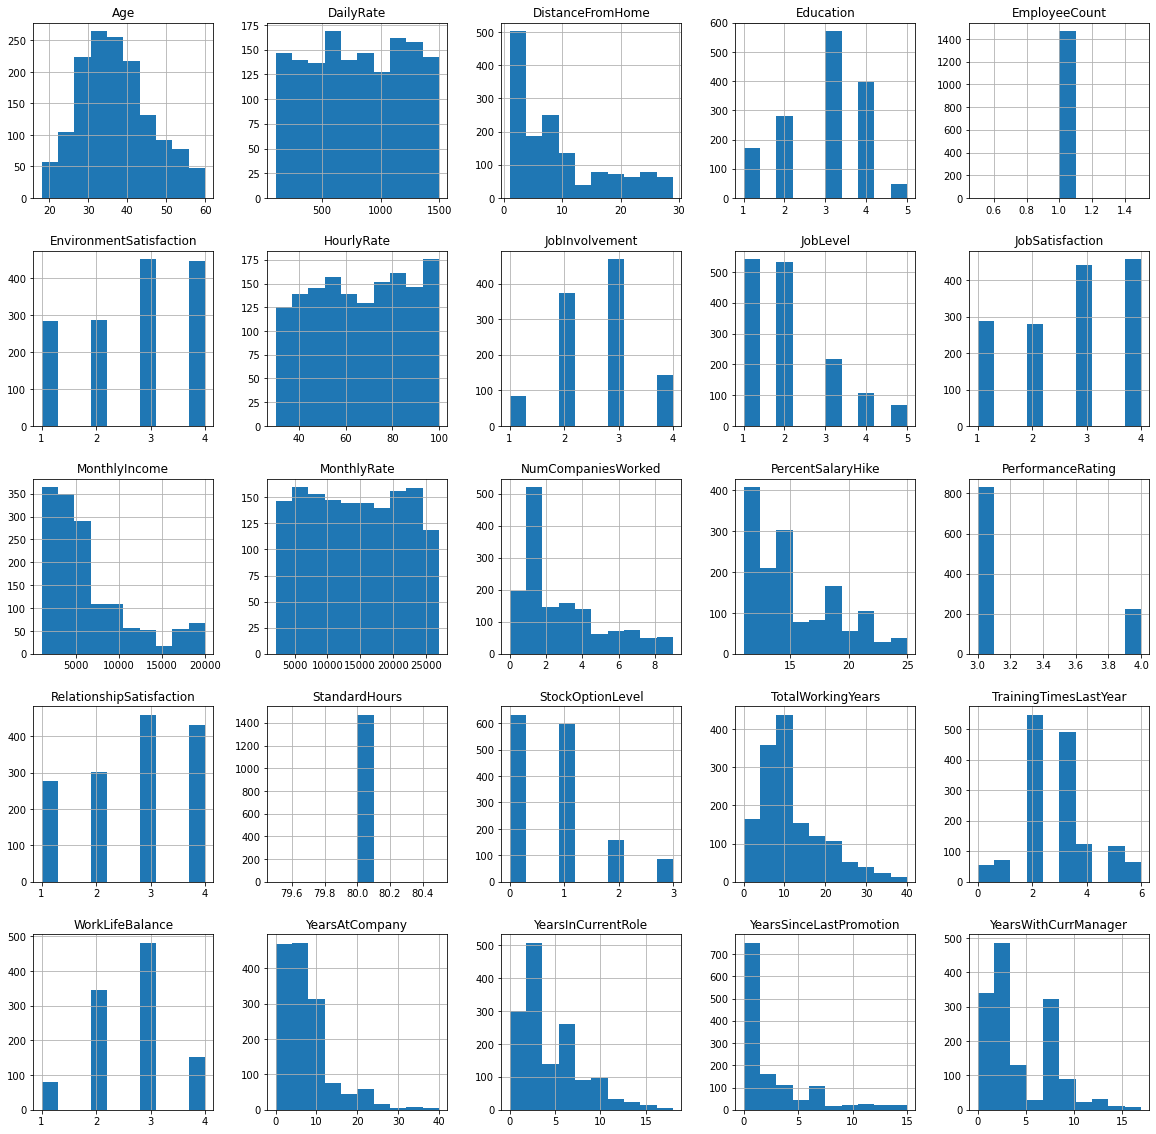

In [14]:
#Histogram plot of all columns
data.hist(figsize=(20,20))
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

(1)Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). <br> 
    
(2)Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.<br> 
    
(3)EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.

    

    
</div>

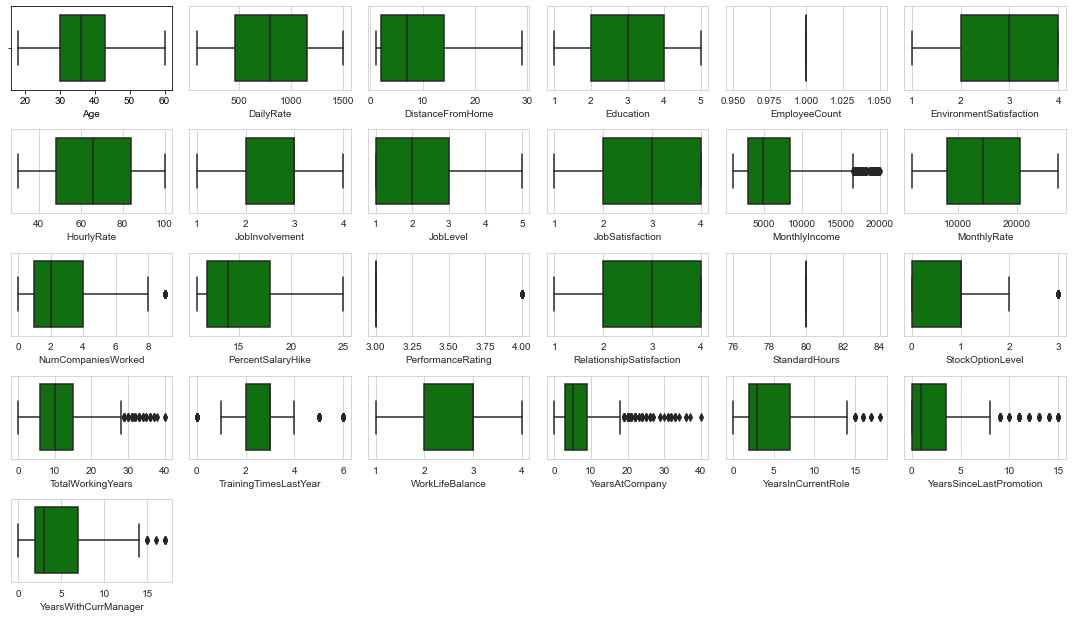

In [15]:
#outlier Detection using box plot
plt.figure(figsize=(15,10))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_numerics_only[l[i]],color='green',orient='v')
    plt.tight_layout()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

- There are outliers in 
      "MonthlyIncome"
      "TotalWorkingYears"
      "YearsAtCompany"
      "YearsInCurrentRole"
      "YearsSinceLastPromotion"
      "YearsWithCurrManager"    
</div>

CATEGORICAL DISTRIBUTION BY THE TARGET (ATTRITION)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


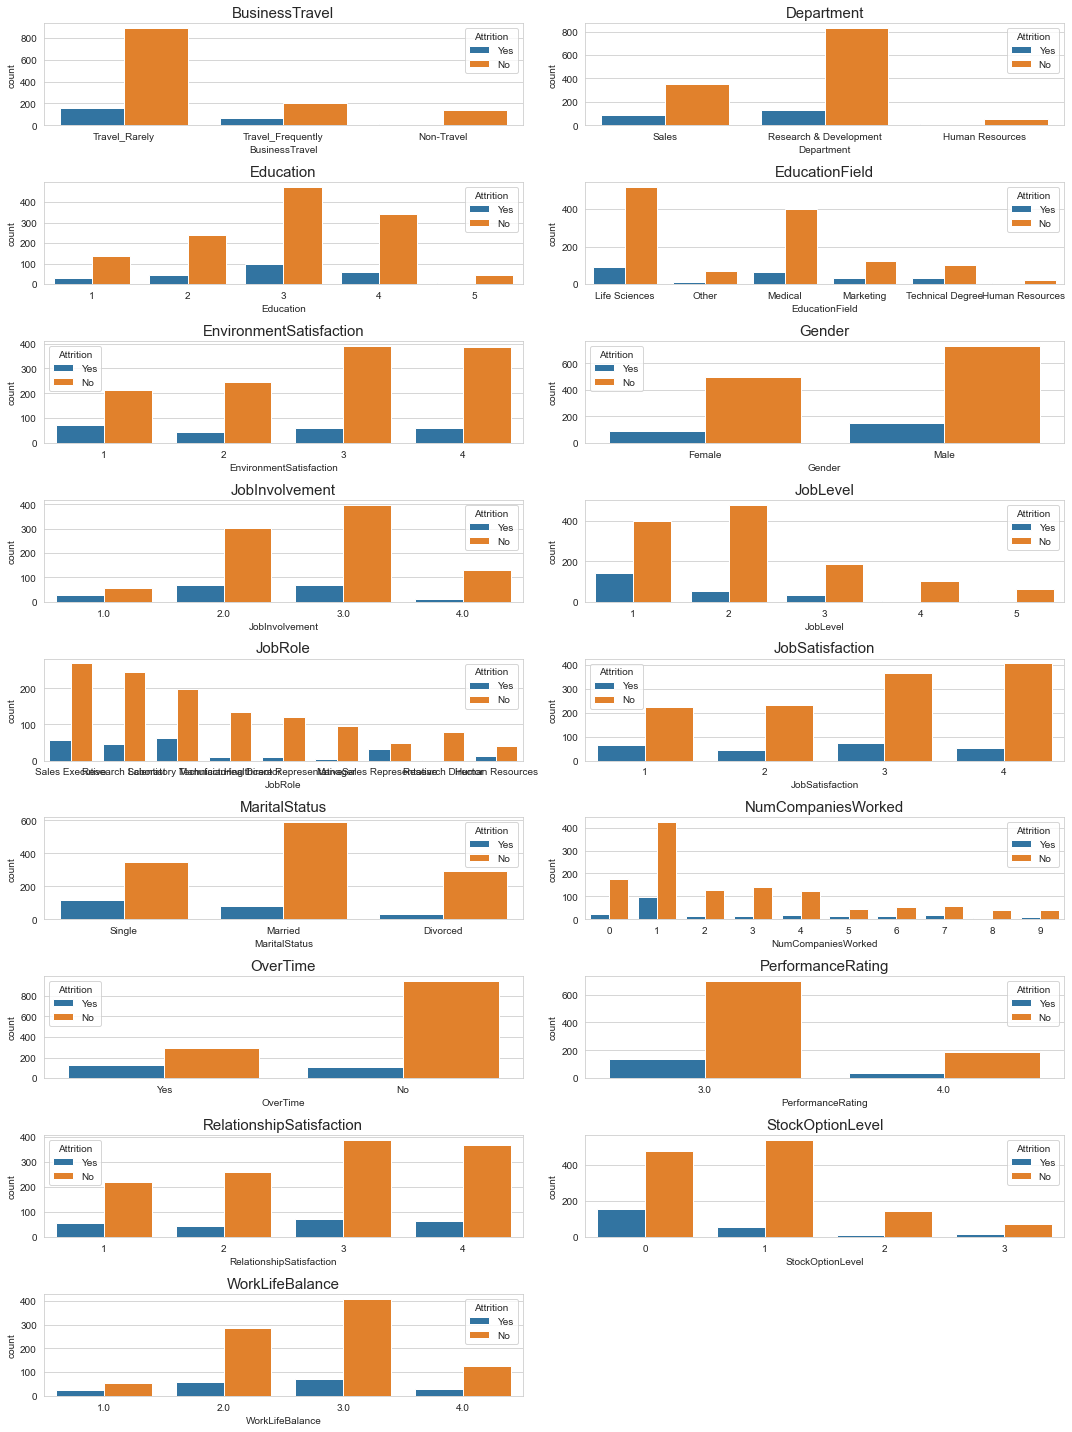

In [16]:
print("CATEGORICAL DISTRIBUTION BY THE TARGET (ATTRITION)")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

plt.figure(figsize=(15,20))
for i, col in enumerate(cat_cols):    
    plt.subplot(9,2,i+1)
    sns.set_style('whitegrid')
    plt.title(col,fontsize=15)
    sns_plot = sns.countplot(x=col, hue='Attrition', data=data)
    plt.tight_layout()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

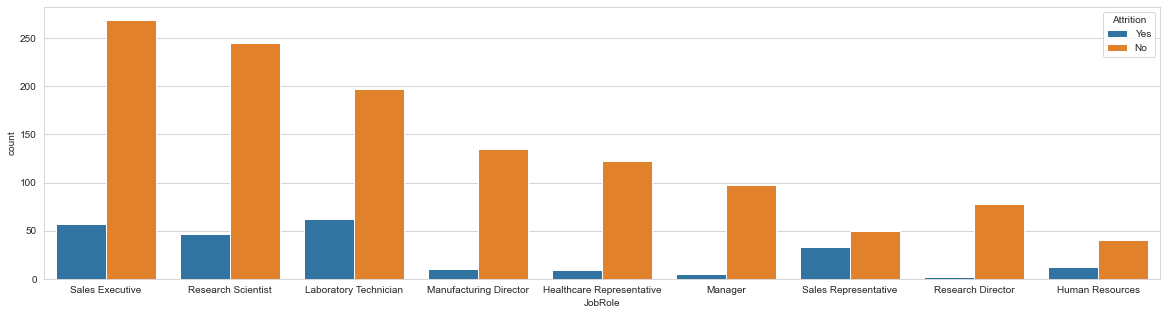

In [17]:
#countplot of attrition w.r.t Jobrole
plt.figure(figsize = (20, 5))
sns.countplot( x="JobRole",data = data, hue = 'Attrition')

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    

    
(1)BusinessTravel :Most of the Employees who left the company travel rarely for business purposes (ie most likely employees in  dept other than sales) <br> 

(2)Department : Most of the Employees who left the company  are  from 'Research & Development' dept.<br> 
 
(3)Education:Most of the Employees who left the company  are graduates

(4)EducationField : Most of the Employees who left the company are from educational field of life sciences and medical (ie employees in 'Research & Development' dept).<br> 
    
(5)EnvironmentSatisfaction:Most of the Employees who left the company  had low environment satisfaction.<br> 

(6)Gender : Male Employees are more likely to quit.<br> 
    
(7)JobInvolvement:Most of the Employees who left the company  had medium job involvement<br> 
    
(8)Joblevel:The workers with low JobLevel are more likely to quit their jobs.<br> 

(9)JobRole :  Most of the Employees who left the company was in the job roles of Laboratory Technician, Sales Executive, and Research Scientist<br>   
    
(10)JobSatisfaction:Most of the Employees who left the company had high job satisfaction
    
(11)MaritalStatus Most of the Employees who left the company  are single.<br> 
    
(12)NumCompaniesWorked:Most of the Employees who left the company have only worked in less than 1 companies<br> 

(13)OverTime : The workers who work over time are likely to quit than others.<br> 
    
(14)RelationshipSatisfaction:Most of the Employees who left the company was  happy in their relationship<br> 
    
(15)StockOptionLevel:Most of the Employees who left the company didn’t have any stock options.<br> 
    
(16)WorkLifeBalance:Most of the Employees who left the company had better work life balance

    
</div>

In [18]:
import plotly.express as px

age_attrition=data.groupby(['Age','Attrition']).apply(lambda x:x['Age'].count()).reset_index(name='Counts')
px.line(age_attrition,x='Age',y='Counts',color='Attrition',title='Agewise Count of Employees ')


<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
Employees who left the company are of the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. 
    
</div>

In [19]:


yrs_attrtion=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['Age'].count()).reset_index(name='Counts')
px.line(yrs_attrtion,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Count of Employees w.r.t working years ')



<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
Employees leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer.
    
</div>

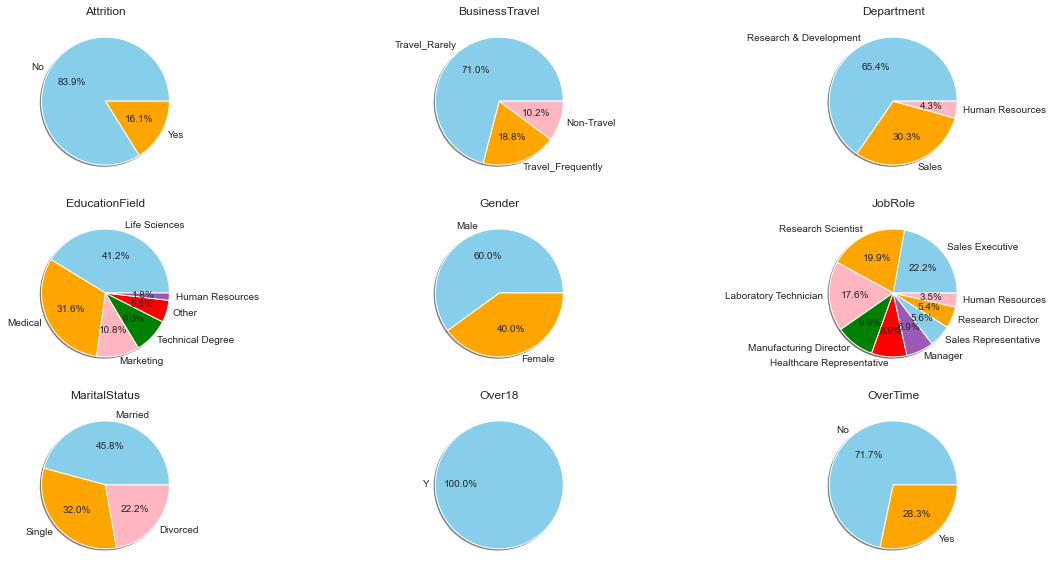

In [20]:
#Univariate analysis
#Pie charts of categorical columns
plt.figure(figsize=(20,10))
for i, col in enumerate(df_obj_only.columns): 
    plt.subplot(3,3,i+1)
    plt.title(col)
    plt.pie(data[col].value_counts(),labels=data[col].value_counts().index,autopct='%1.1f%%',shadow=True,colors=["skyblue","orange","lightpink","green","red","#9b59b6"])

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 

       (1) Only 16.1% of the employees are seen leaving the company.
       (2) 71% of the employees travel rarely for business purposes.
       (3) 65.4% of the company is comprising of Research and Development department , followed by 30.3% of 
           Sales department.
       (4) Around 41.2% of the employees have an educational background in LifeSciences and very less from are
           HR background.
       (5) Around 60% of the employee population of the company are male employees and the rest 40% Females.
       (6) A larger part of 22.2% of the employees are in the Sales Executives, followed by Research Scientist 
           and Lab Technician. 
       (7) About 45.8% of the employees have marital status as single, around 32% married and 22.2% divorced.
       (8) Every employees are over 18.
       (9) only 28% of the employees work OverTime.

    

    
</div>

<AxesSubplot:ylabel='EmployeeNumber'>

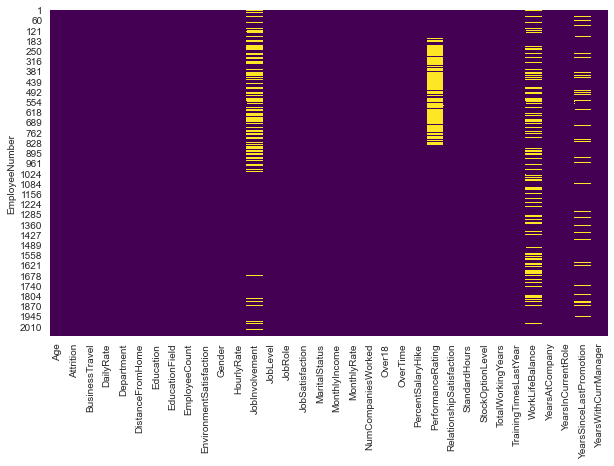

In [21]:
#Visualising proportion of null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
 
We see that the columns JobInvolvement, PerformanceRating, WorkLifeBalance and YearsSinceLastPromotion has missing values in them. Since the dropping null values will cause a drop in important information from the dataset, we'll be filling them with relevant imputation methods.
    

    
</div>

<AxesSubplot:>

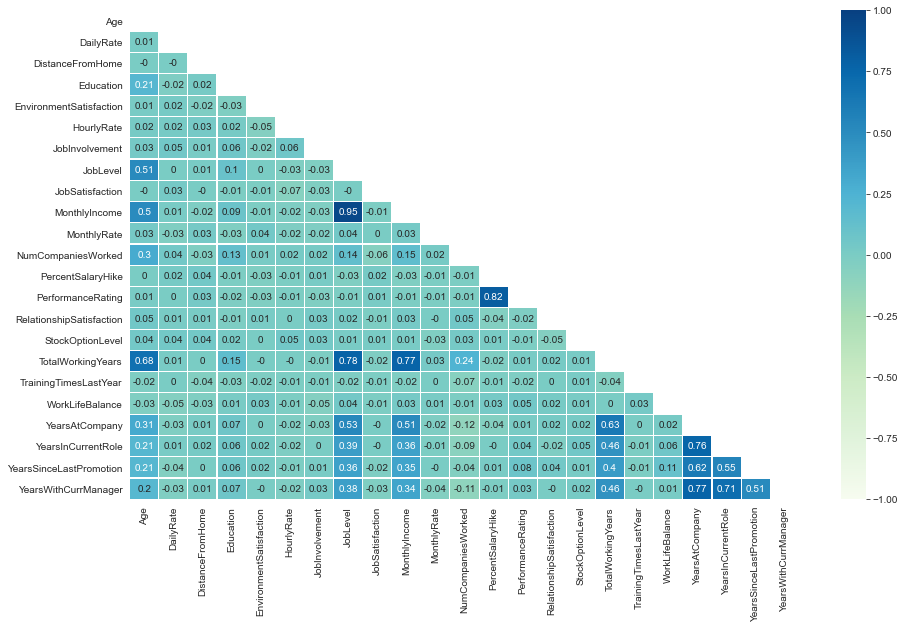

In [22]:
#To check correlation among features
plt.figure(figsize=(15,9))
mask = np.triu(np.ones_like(data.drop(['StandardHours','EmployeeCount'],axis=1).corr()))
sns.heatmap(data.drop(['StandardHours','EmployeeCount'],axis=1).corr().round(2),vmin=-1,vmax=1,cmap='GnBu',mask=mask,linewidth=0.1,annot=True,center=0)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
 
There is positive high correlation between:
    
              (1) Age and TotalWorkingYears
              (2) JobLevel and TotalWorkingYears
              (3) MonthlyIncome and TotalWorkingYears
              (4) JobLevel and MonthlyIncome
              (5) PerformanceRating and SalaryHike
    

    
</div>

Bivariate 

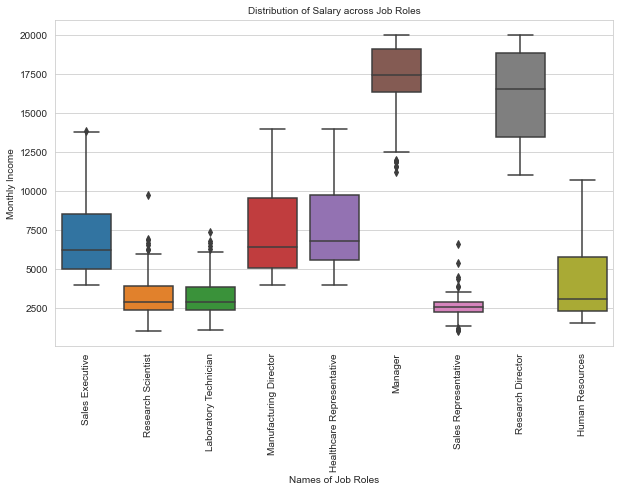

In [23]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x = data['JobRole'], y =data['MonthlyIncome'], data = data)
ax.set_xlabel(xlabel = 'Names of Job Roles', fontsize = 10)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 10)
ax.set_title(label = 'Distribution of Salary across Job Roles', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
(1)  Average salaries of Managers and Research Director has to be obviously on the higher side.

(2) Average salary of Sales Representatives, Laboratory Technicians  tends to be on the lower side. these groups comparatively had the highest attrition among the other roles. This possibly leads to the fact that low monthly income could be a cause for higher attrition rates of these employee groups.   

    
</div>

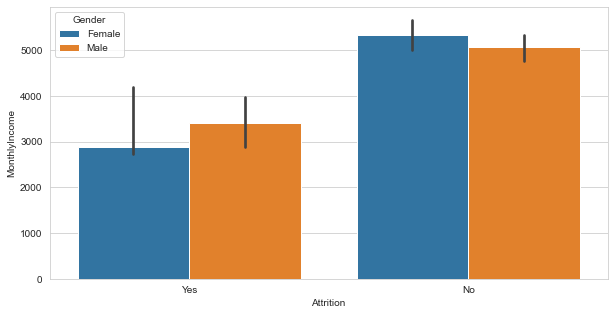

In [24]:
#Bar plot of MOnthly income from the rate of attrition according to gender
#Estimator used is median
from numpy import median
f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=data, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
- Male employees who left the company had highly average monthly income .<br> 
- Female employees that stay in the company have highly average monthly income   

    
</div>

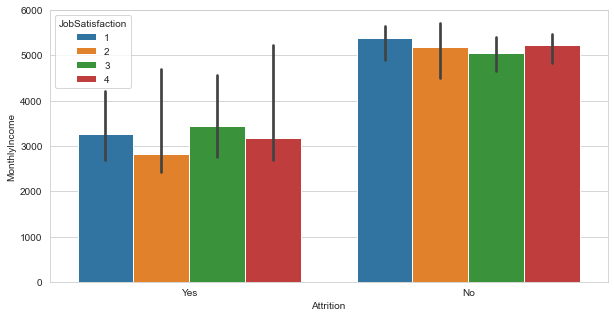

In [25]:
#Bar plot of Job Satisfaction with respect to Monthly income 
#Estimator used is median
f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=data, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br> 
    
- Employees with high average monthly income   whom had  left the company was satisfied with their jobs. <br> 
- Employees currently in the company with highly average monthly income are not satisfied with their jobs.   

    
</div>

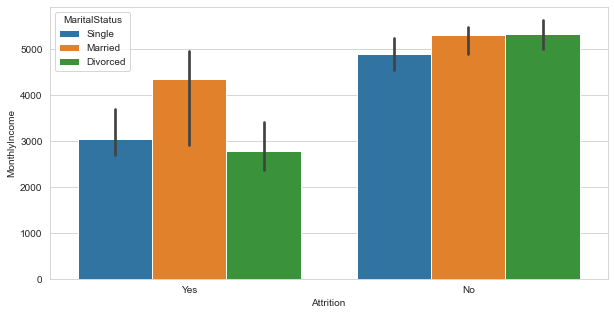

In [26]:
#Bar plot of Job Satisfaction with respect to Relationship Status
#Estimator used is median
f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=data, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     
- Married Employees who left the company had high average monthly income  <br>    

    
</div>

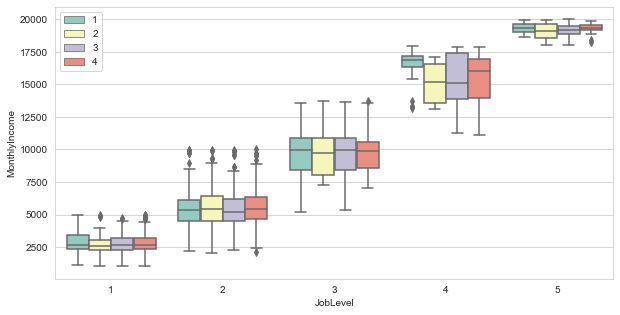

In [27]:
#box plot of mnthly income w.r.t job satisfaction
f,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data, hue='JobSatisfaction',palette='Set3')
plt.legend(loc='best')
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     
- Most of the Employees who are in the highest job level with high monthly income are not satisfied with their jobs    
</div>

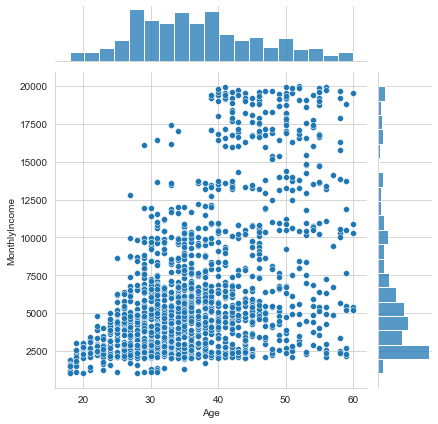

In [28]:
#scatter plot of Employees Age w.r.t MonthlyIncome
sns.jointplot(data.Age,data.MonthlyIncome, kind = "scatter")   
plt.show()

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>     
- Employees aged between 40-60 have highest monthly income  <br>  
- Employees aged between 18-30 have mostly lowest monthly income
</div>

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

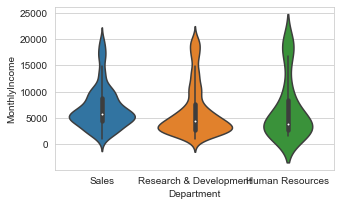

In [29]:
#violin plot of monthly income w.r.t department
plt.figure(figsize=(5,3))
sns.violinplot(x='Department',y='MonthlyIncome',data=data,size=6)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>   
 
(1) Larger portion of employees the Sales department has a monthly income around 5000 followed by an income of  10,000 and maximum monthly income range seem to be around 23,000.<br>
(2) A wide range of the employees in the R&D department gets a monthly income a bit less than the sales department<br> 
(3) The HR employees seem to have a monthly income range varying from below 5000 to a maximum of nearly close to 25,000
</div>

<AxesSubplot:xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

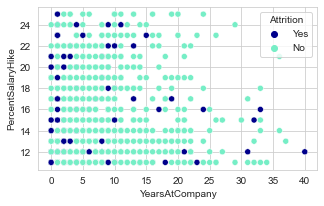

In [30]:
#Scatter plot of employees YearsAtCompany & PercentSalaryHike
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['YearsAtCompany'],y=data['PercentSalaryHike'],hue=data['Attrition'],palette=['darkblue','#76EEC6'])

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>   
 
(1) The employees leaving the company are mostly the people who worked with the company for a lesser period of time.<br>   
 2) The employees who are leaving after working in the company for a long period of time are the ones 
       who had very less hike in the percent of salary
</div>

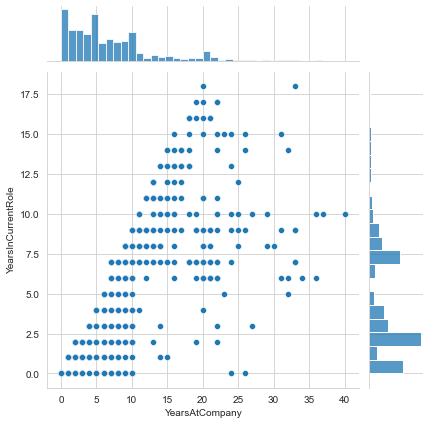

In [31]:
#jointplot of employees YearsAtCompany & Yearsincurrentrole
sns.jointplot(x='YearsAtCompany',y='YearsInCurrentRole',data=data)

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>   
 
(1) There are many employees with same job role who have been in the company for more than 8 years 

</div>

In [32]:
# Hypothesis testing using Chi-square test - 

Chi-square test - For checking dependancy between the target variable and the other features

            The null hypothesis          H0 : Attrition and categorical features are not dependant of each other
            The alternate hypothesis     H1 : Attrition and categorical features are dependant                  

In [33]:
from scipy import stats
#Chi square test
for i in cat_cols:
    if i!='Over18':
        contingency_table=pd.crosstab(data['Attrition'],data[i])
        obs=contingency_table.values
        b=stats.chi2_contingency(contingency_table)
        exp=b[3]
        rows=len(contingency_table.iloc[0:2,0])
        col=len(contingency_table.iloc[0,0:2])
        ddof=(rows-1)*(col-1)
        alpha=0.05
        from scipy.stats import chi2
        chi_square=sum([(o-e)**2./e for o,e in zip(obs,exp)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        critical=chi2.ppf(q=1-alpha,df=ddof)
        pvalue=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        print(i,"-",pvalue<alpha)

BusinessTravel - True
Department - True
Education - False
EducationField - False
EnvironmentSatisfaction - True
Gender - False
JobInvolvement - True
JobLevel - True
JobRole - True
JobSatisfaction - True
MaritalStatus - True
NumCompaniesWorked - True
OverTime - True
PerformanceRating - False
RelationshipSatisfaction - True
StockOptionLevel - True
WorkLifeBalance - True


<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong><br>   
 
For features-
    
     Education,
     EducationField,
     Gender,
     Performance Rating 
    
the pvalue is greater than the significance level. So we accept the null   hypothesis.
    
Therefore, Attrition is not dependant on Education,EducationField,Gender & Performance Rating .
    
</div>

### Pre-processing